In [ ]:
# Hello Team, I am not creative enough for data visulaization
# Please help to create more interesting plots since I think our model won't be very complicated

# I started merging unemployment rate, min wage, CPI and immigration data, since the tax rate is a liitle bit hard to understand for me
# please feel free to update anything 

# And delete all my comments at the end LOL !!!!!!!

In [23]:
import pandas as pd

#merged_data = pd.read_csv('team_project_2/data/processed/merged_data.csv')
#immigration_data = pd.read_csv('team_project_2/data/processed/immigration_combined_monthly_year_data.csv')
#cpi_data = pd.read_csv('team_project_2/data/processed/Cleaned_CPI.csv')

#for some reasons on my computer the relative path doesn't work
#I just use my own path but please run the above relative path instead of below on your computer
merged_data = pd.read_csv('/Users/Zhiyang/DSI/team_project_2/data/processed/merged_data.csv')
immigration_data = pd.read_csv('/Users/Zhiyang/DSI/team_project_2/data/processed/immigration_combined_monthly_year_data.csv')
cpi_data = pd.read_csv('/Users/Zhiyang/DSI/team_project_2/data/processed/Cleaned_CPI.csv')


In [24]:
merged_data.head()

,Province_x,Month-Year,Unemployment Rate,Minimum Wage
0,Canada,Jan-1976,7.1,$2.60
1,Canada,Feb-1976,7.0,$2.60
2,Canada,Mar-1976,6.7,$2.60
3,Canada,Apr-1976,6.8,$2.90
4,Canada,May-1976,6.9,$2.90


In [25]:
immigration_data.head()

,Month-Year,Total Value
0,Jan-2015,18690
1,Feb-2015,21055
2,Mar-2015,29955
3,Apr-2015,33580
4,May-2015,32975


In [26]:
cpi_data.head()

,Month-Year,All-items CPI,Province
0,1960-01,15.5,Canada
1,1960-02,15.5,Canada
2,1960-03,15.4,Canada
3,1960-04,15.5,Canada
4,1960-05,15.5,Canada


In [29]:
# Add "province" column to immigration_data
immigration_data['Province'] = 'Canada'
immigration_data.rename(columns={'Total Value': 'Immigration Num'}, inplace=True)
merged_data.rename(columns={'Province_x': 'Province'}, inplace=True)

# Standardize the column names
merged_data['Month-Year'] = pd.to_datetime(merged_data['Month-Year'], format='%b-%Y')
immigration_data['Month-Year'] = pd.to_datetime(immigration_data['Month-Year'], format='%b-%Y')
cpi_data['Month-Year'] = pd.to_datetime(cpi_data['Month-Year'], format='%Y-%m')

# Print column names to verify
print("Merged Data Columns:", merged_data.columns)
print("Immigration Data Columns:", immigration_data.columns)
print("CPI Data Columns:", cpi_data.columns)

# Merge datasets
combined_data = pd.merge(merged_data, immigration_data, on=['Province', 'Month-Year'], how='left')
final_combined_data = pd.merge(combined_data, cpi_data, on=['Province', 'Month-Year'], how='left')

final_combined_data['Month-Year'] = final_combined_data['Month-Year'].dt.strftime('%Y-%m')


Merged Data Columns: Index(['Province', 'Month-Year', 'Unemployment Rate', 'Minimum Wage'], dtype='object')
Immigration Data Columns: Index(['Month-Year', 'Immigration Num', 'Province'], dtype='object')
CPI Data Columns: Index(['Month-Year', 'All-items CPI', 'Province'], dtype='object')


In [30]:
final_combined_data.head(30)

,Province,Month-Year,Unemployment Rate,Minimum Wage,Immigration Num,All-items CPI
0,Canada,1976-01,7.1,$2.60,NaN,30.3
1,Canada,1976-02,7.0,$2.60,NaN,30.5
2,Canada,1976-03,6.7,$2.60,NaN,30.6
3,Canada,1976-04,6.8,$2.90,NaN,30.7
4,Canada,1976-05,6.9,$2.90,NaN,30.9
5,Canada,1976-06,6.9,$2.90,NaN,31.1
6,Canada,1976-07,7.4,$2.90,NaN,31.3
7,Canada,1976-08,7.1,$2.90,NaN,31.3
8,Canada,1976-09,7.0,$2.90,NaN,31.5
9,Canada,1976-10,7.4,$2.90,NaN,31.7


In [39]:
# let's check
result = final_combined_data[(final_combined_data['Month-Year'] == '2020-01') & (final_combined_data['Province'] == 'Canada')]
print(result)

CPI = cpi_data.loc[(cpi_data['Month-Year'] == '2020-01') & (cpi_data['Province'] == 'Canada'), 'All-items CPI']
print(CPI)

Imm = immigration_data.loc[immigration_data['Month-Year'] == '2020-01-01', 'Immigration Num']
print(Imm)

    Province Month-Year  Unemployment Rate Minimum Wage  Immigration Num  \
528   Canada    2020-01                5.5          NaN          32205.0   

     All-items CPI  
528          136.8  
720    136.8
Name: All-items CPI, dtype: float64
60    32205
Name: Immigration Num, dtype: int64


In [40]:
# Save the combined data to a new CSV file as draft

# Again, please change the path!!!!!!!!!!!!!!
final_combined_data.to_csv('/Users/Zhiyang/DSI/team_project_2/data/processed/combined_withNaN.csv', index=False)

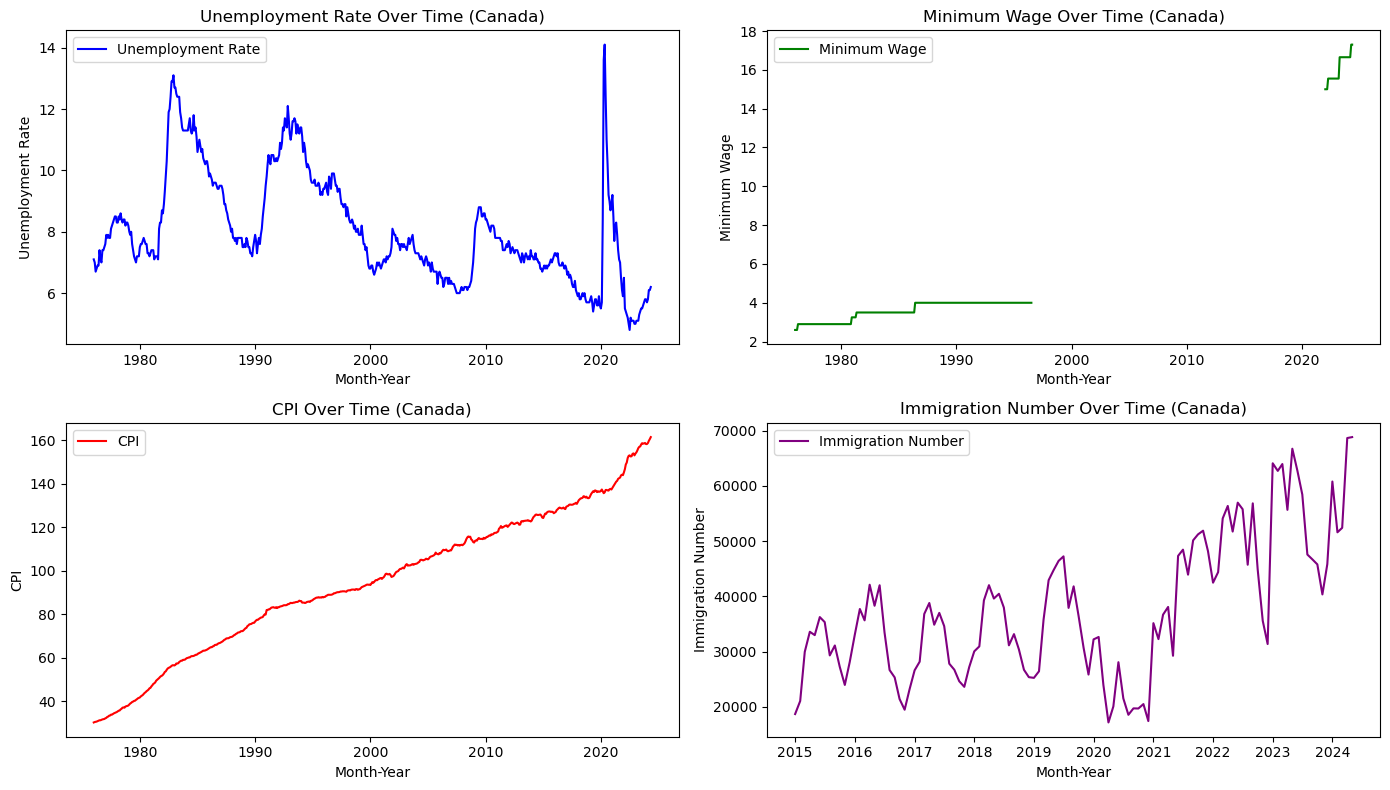

In [44]:
# simple visulization for Canada only
import matplotlib.pyplot as plt

# Canada only
canada_data = final_combined_data[final_combined_data['Province'] == 'Canada']

plt.figure(figsize=(14, 8))

# Plot unemployment rate
plt.subplot(2, 2, 1)
plt.plot(canada_data.index, canada_data['Unemployment Rate'], label='Unemployment Rate', color='blue')
plt.title('Unemployment Rate Over Time (Canada)')
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate')
plt.legend()

# Plot minimum wage
plt.subplot(2, 2, 2)
plt.plot(canada_data.index, canada_data['Minimum Wage'].str.replace('$', '').astype(float), label='Minimum Wage', color='green')
plt.title('Minimum Wage Over Time (Canada)')
plt.xlabel('Month-Year')
plt.ylabel('Minimum Wage')
plt.legend()

# Plot CPI
plt.subplot(2, 2, 3)
plt.plot(canada_data.index, canada_data['All-items CPI'], label='CPI', color='red')
plt.title('CPI Over Time (Canada)')
plt.xlabel('Month-Year')
plt.ylabel('CPI')
plt.legend()

# Plot immigration number
plt.subplot(2, 2, 4)
plt.plot(canada_data.index, canada_data['Immigration Num'], label='Immigration Number', color='purple')
plt.title('Immigration Number Over Time (Canada)')
plt.xlabel('Month-Year')
plt.ylabel('Immigration Number')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
# now let's work with NaN value
# for example, provincial CPI only have data after 1978

# Filter the data for Canada only and after 2015
filtered_data = final_combined_data[(final_combined_data['Province'] == 'Canada') & (final_combined_data.index >= '2015-01-01')]

# Select the relevant columns
data = filtered_data[['Unemployment Rate', 'All-items CPI', 'Immigration Num']].dropna()


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the independent variables (CPI and Immigration Num) and dependent variable (Unemployment Rate)
X = data[['All-items CPI', 'Immigration Num']]
y = data['Unemployment Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
rf_results = {
    'Mean Squared Error': mse,
    'R-squared': r2
}

rf_results

{'Mean Squared Error': 0.6009515652173917, 'R-squared': 0.7005600870335132}